In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv(r'Sleep_disorder_data.csv',index_col=0,header=0)

In [ ]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [ ]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
data.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0
Heart Rate,0


In [ ]:
data['Sleep Disorder'].fillna('No Disorder',inplace=True)
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Text(0, 0.5, '')

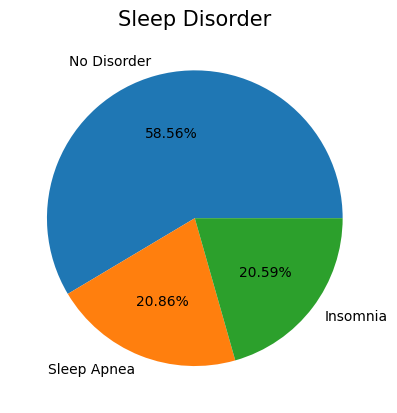

In [ ]:
data["Sleep Disorder"].value_counts().plot(kind="pie",autopct='%1.2f%%')
plt.title("Sleep Disorder", fontsize=15)
plt.ylabel("")

In [ ]:
### 20.86% have sleep apnea
### 20.59% have insomnia
### 58.56% does not have sleep disorder

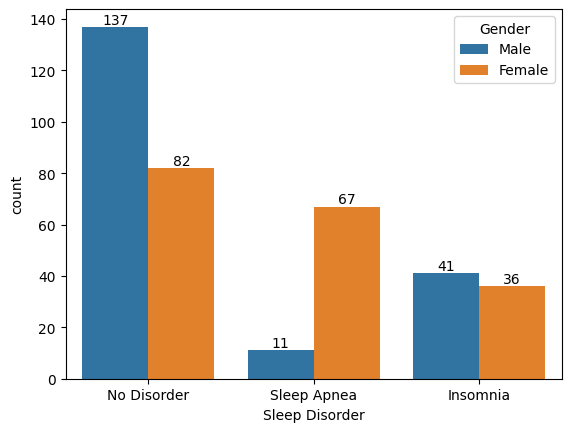

In [ ]:
ax = sns.countplot(data = data, x = 'Sleep Disorder', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
# Total number of Males = 189
# Total Number of Females = 89
# Sleep disorder/Sleep Apnea : Males = 11 and Females = 67
# No disorder : Males= 137 and Females = 82
# Insomnia : Males = 41 and Females  = 36.

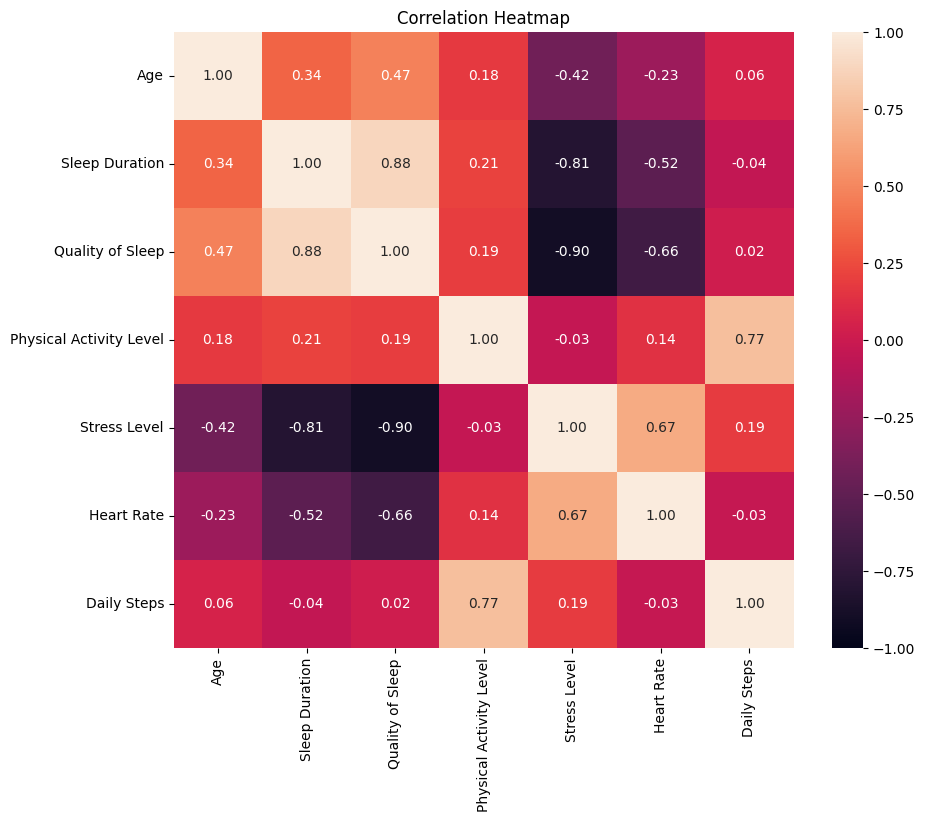

In [ ]:
#Correlation Heatmap for Numerical Variables
plt.figure(figsize=(10, 8))
corr = data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].corr()
sns.heatmap(corr, annot=True, fmt=".2f",vmax=1,vmin=-1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
"""
This code creates a correlation heatmap for the numerical variables from the dataset, such as 'Age', 'Sleep Duration',
'Quality of Sleep', etc. It calculates the correlation matrix (corr()) between these variables and uses
seaborn's heatmap function to visualize the correlations, with annotations showing the correlation values and a
color scale (coolwarm) representing the strength of the correlations. The plot is customized with a title,
and annot=True displays the exact correlation values within the heatmap.
"""

"\nThis code creates a correlation heatmap for the numerical variables from the dataset, such as 'Age', 'Sleep Duration', \n'Quality of Sleep', etc. It calculates the correlation matrix (corr()) between these variables and uses \nseaborn's heatmap function to visualize the correlations, with annotations showing the correlation values and a \ncolor scale (coolwarm) representing the strength of the correlations. The plot is customized with a title, \nand annot=True displays the exact correlation values within the heatmap.\n"

In [ ]:
#vmax and vmin control the color scaling of the heatmap, setting the upper and lower bounds for the correlation values
##High Stress Levels: Individuals experiencing higher stress levels may find it difficult to fall asleep or stay asleep, leading to shorter sleep durations.
#Impact on Well-Being: This relationship is important because poor sleep can further exacerbate stress and
#negatively affect overall mental and physical health.
## High physical activity less stress

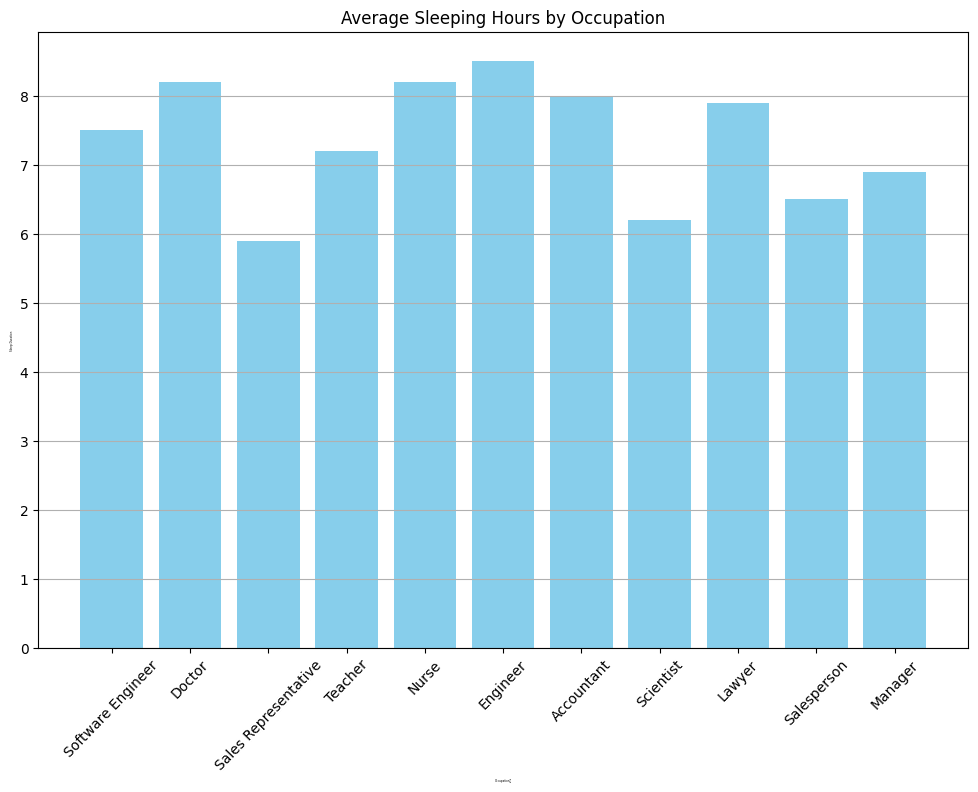

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar('Occupation','Sleep Duration',data=data, color='skyblue')

plt.title('Average Sleeping Hours by Occupation', fontsize=12)
plt.xlabel('Occupation	', fontsize=2)
plt.ylabel('Sleep Duration', fontsize=2)
plt.xticks( rotation=46)

# Displaying the plot
plt.grid(axis='y')
plt.show()

#Occupation wise while sleeping hour Bar chart

In [ ]:
# Doctors are having least amount of sleep
# Engineers are having good amount of sleep
# Scientist are having second lowest amount of sleep

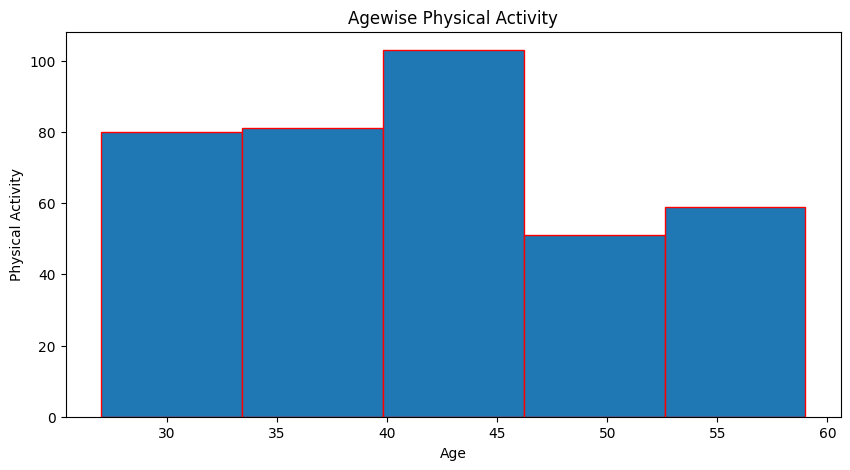

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data["Age"],bins=5,edgecolor="red")
plt.xlabel("Age")
plt.ylabel("Physical Activity")
plt.title("Agewise Physical Activity")
plt.show()

In [ ]:
import plotly.express as px
sleep_df=pd.DataFrame(data,columns=['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'])
fig=px.sunburst(sleep_df,path=['Gender','Occupation', 'Sleep Disorder'],color="Sleep Disorder",title="sleeping disorders by gender")
fig.show()

In [30]:
fig=px.scatter(data,x='Occupation',y='Sleep Duration',color='Sleep Disorder')
fig.show()

engineers have the most sleep so they doesnot suffer from sleep disorder
    teacheris the most jub suffring from sleep disorder

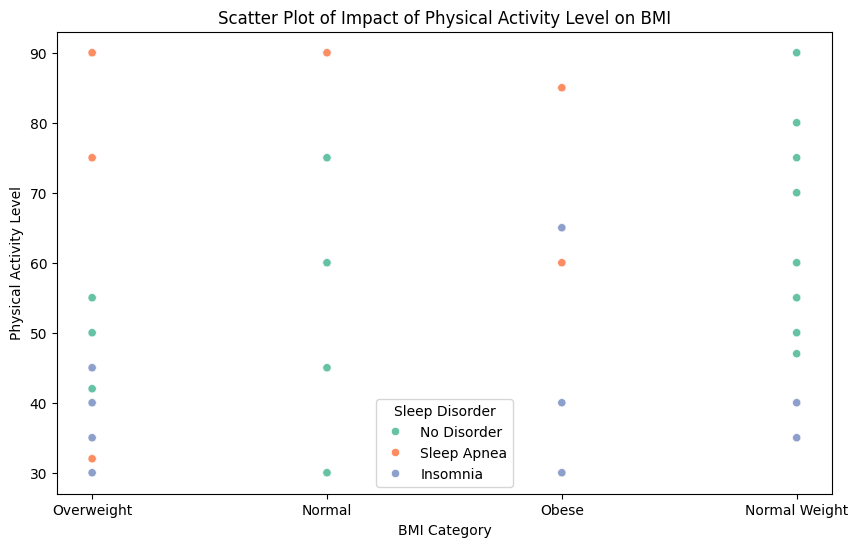

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x='BMI Category', y='Physical Activity Level',hue='Sleep Disorder', palette='Set2')
plt.title('Scatter Plot of Impact of Physical Activity Level on BMI')
plt.xlabel('BMI Category')
plt.ylabel('Physical Activity Level')
plt.show()

In [33]:
sleep_disorder = data[(data["Sleep Disorder"] == "Sleep Apnea") | (data["Sleep Disorder"] == "Sleep Disorder")]
sleep_disorder

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
18,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,Sleep Apnea
31,Female,30,Nurse,6.4,5,35,7,Normal Weight,130/86,78,4100,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


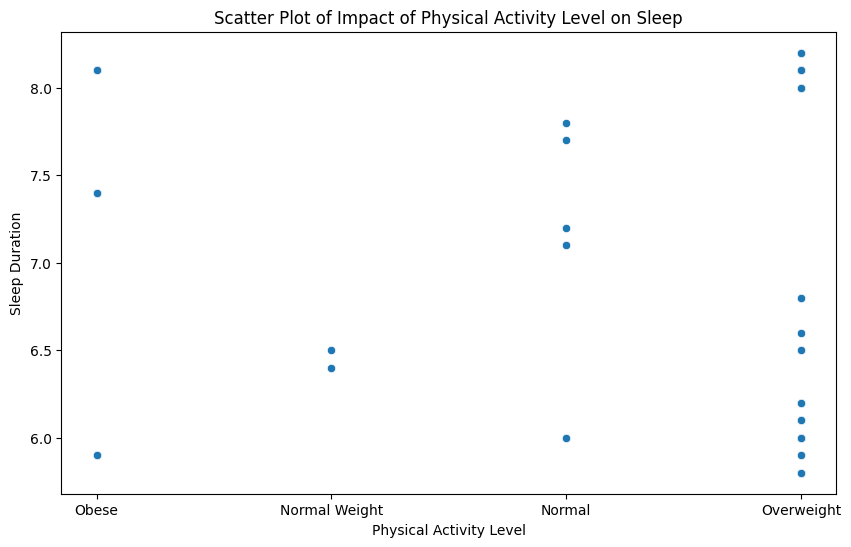

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(sleep_disorder, x='BMI Category', y='Sleep Duration', palette='Set2')
plt.title('Scatter Plot of Impact of Physical Activity Level on Sleep')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration')
plt.show()